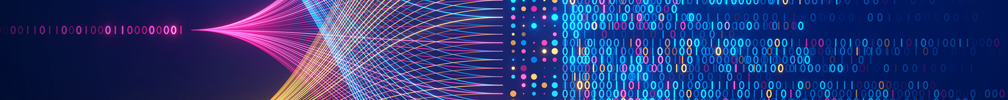

# Week 10 Overview
This week, we will continue to develop our understanding of linear algebra by exploring matrices. Matrices are the quintessential structure of linear algebra. Vectors and scalars can be considered special cases of matrices, and nearly everything in linear algebra is described in matrix operations. We will start the week with an overview of basic matrix concepts and dig deeper into each concept and operation – more than our previous terminology teaser allowed. Then we cover matrix row operations, the workhorse of linear algebra, which will be the building block of many algorithms and proofs used for machine learning. Next week, we will use some of these techniques to systematically solve linear equations.

### Learning Objectives
At the end of this week, you should be able to:
- Describe matrices in terms of numbers and dimensions
- Implement matrix/scalar and matrix/matrix operations including addition and multiplication with for loops and the NumPy library
- Recognize problems including linear regression that can be formulated as vector or matrix multiplication problems
- Implement matrix multiplication with the NumPy library
- Use row operations in the context of matrix equations 
- Explain matrix ranks and how they limit the use of matrices
- Explain when to use Gaussian elimination

## Topic Overview: Basic Matrix Concepts

### Topic Overview
We will now cover basic matrix concepts starting from the notation and working our way through matrix arithmetic and norms. Then we will dig in on matrix multiplication, an easy to explain operation that finds itself everywhere from linear models to equation solvers to neural nets. While we have seen these concepts and operations previously, this time we will cover them in more detail and fill in more of their background material and real-world usage.

### Learning Objectives
By the end of this topic, you should be able to:
- Describe matrices in terms of numbers and dimensions
- Implement matrix/scalar and matrix/matrix operations including addition and multiplication with for loops and the NumPy library
- Recognize problems including linear regression that can be formulated as vector or matrix multiplication problems
- Implement matrix multiplication with the NumPy library

### 10.1 Lesson: Matrix Notation and Basic Operations

#### Definitions
An $m \times n$ matrix is a two-dimensional structure containing $mn$ numbers. Traditionally, an $m \times n$ matrix is visualized as a table with $m$ rows and $n$ columns. Variable names for matrices tend to use capital leetters, distinguishing them from the "smaller" vectors and scalars. 

The following matrix $A$ has 3 rows and two columns.
$$
A = 
\begin {bmatrix}
A_{0,0} & A_{0,1}\\
A_{1,0} & A_{1,1}\\
A_{2,0} & A_{2,1}
\end{bmatrix}
$$

$A_{ij}$ denotes the value or element in the $i$th row and $j$th column.

#### Square Matrices
An $m  \times n$ matrix is square if and only if $m=n$. 

Matrices of raw data usually are not square. However, many operations end up creating square matrices. Others will only work on square matrices. 

#### Matrix Diagonals
The diagonal of an $m \times n$ matrix is the elements $A{i,j}$ for $i=0$ to min$(m,n) - 1$.

#### Diagonal Matrix
A matrix $M$ is a diagonal matrix if and only if $M_{ij}=0$ whenever $i \neq j$.

In other words, a diagonal matrix is zeros except on its diagonal. 

#### Matrix Trace
The trace of matric $M$, denoted $\text{trace}(M)$, is the sum of its diagonal elements. 
$$
\text{trace}(M) = \sum_iM_{i,j}
$$
We will see some surprising connections between matrix traces and matrix multiplication shortly.

#### matrix transposition
Given an $m \times n$ matrix $A$, its transpose $A^T$ is an $m \times n$ matrix such that
$$
(A^T)_{ij} = A_{i,j}
$$
For example
$$
\begin {bmatrix}
1 & 2 & 3\\
4 & 5 & 6
\end{bmatrix}^T
=
\begin{bmatrix}
1 & 4\\
2 & 5\\
3 & 6
\end{bmatrix}
$$

#### Symmetric Matrix
A matrix $M$ is symmetric if and only if it is the same as its transpose.
$$M \text{ is symmetric} \iff M = M^T$$

In [134]:
import numpy as np
matrix = np.asarray([[1, 2, 3], [2, 4, 5], [3, 5, 6]])
matrix

array([[1, 2, 3],
       [2, 4, 5],
       [3, 5, 6]])

In [135]:
transpose_matrix = matrix.T
transpose_matrix

array([[1, 2, 3],
       [2, 4, 5],
       [3, 5, 6]])

In [136]:
matrix == transpose_matrix

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

### Matrix Arithmetic
Both addition and multiplication by scalars can be done with matrices. This is done by adding or multiplying each element individually.

Similarly, two matrices may be added or multiplied in an element-wise fashion. This is the default for matrix addition but not for multiplication. Linear algebra has its own matrix multiplication operation, defined in the next lesson.

Element-wise operations were previously defined, but here is an example with addition to refresh your memory.

#### Addition of Two Vectors
When adding two vectors, the inputs should have the same dimension, and each output element will be the sum of the corresponding input elements.
$$
\begin{bmatrix} a_0\\a_1\\ \dots \\ a_{n-1}\end{bmatrix} + 
\begin{bmatrix} b_0\\b_1\\ \dots \\ b_{n-1}\end{bmatrix} =
\begin{bmatrix} a_0 + b_0 \\ a_1 + b_1\\ \dots \\ a_{n-1} + b_{n-1}\end{bmatrix}
$$
Adding row vectors behaves similarly.

#### Zero Matrix
The $m \times n$ zero matrix, sometimes denoted $O$ or $0$, is the $m \times n$ matrix with all zero elements
$$
O_{ij} = 0
$$
For any matrix **A, A + 0 = 0 + A = A**

### Compare and Contrast
- NumPy handles basic matrix-scalar and matrix-matrix math in an element-wise fashion. When not using the named functions, element-wise addition and multiplication are handled by the operators `+` and `*` respectively. The matrix multiplication in the next lesson is implemented by the `matmul` function and the `@` operation.
- Many spreadsheets in Microsoft Excel and Google Sheets have implicit element-wise operations.

## Lesson 10.2: 

### Matrix Multiplication
Given matrix $A$ with dimensions $m \times n$ and matrix $B$ with dimensions $n \times o$, then their matrix product $AB$ is a matrix with dimensions $m \times o$ such that 

$$
(AB)_{ij} = \sum^{n-1}_{k=0}A_{i,k}B_{kj}
$$

The process of computing the matrix product is called matrix multiplication.

### Matrix Multiplication and Vector Dot Products
For column vectors $a$ and $b$, dot products can be defined with matrix multiplication
$$
a \cdot b = a^Tb
$$
Or matrix multiplication can be defined in terms of dot products.
$$(AB) = [A_{i,o}, \dots, A_{i,n-1}] \cdot [B_{0j},\dots, B_{n-1j}]$$

### Matrix Multiplication and Linear Functions
Linear functions can be implemented as a matrix multiplication if the additive constant is ignored or a dummy one column is used.

For row vector $x$ and linear function coefficients in column vector $c$,
$$ f(x) = \text{xc} $$

And if there are several rows of data in matrix $X$, they can be calculated together as 

$$f(X) = Xc$$

And if there are also several linear functions to compute for each of those rows of data, and they are stored in matrix $C$,

$$F(X) = XC$$

#### Associativity of Matrix Multiplication

Matrix multiplication is associative.

$$ \text{(AB)C } = \text { C(BA)}$$

This is the same familiar associativity property that normal addition and multiplication have. If there are many matrix multiplications to perform in a row, the parentheses don't matter. You can multiply adjacent matrices in any order and get the same result.

On the other hand, matrix multiplication is not commutative. It is not generally true that $AB = BA$. In fact, reversing the order may not be a valid matrix multiplication if the dimensions do not match.

#### Identity Matrix
An identity matrix is an $n \times n$ matrix $I_n$ such that for any $m \times n$ matrix $A$ or any $n \times m$ matrix $B$.

$$AI_n = A$$
$$I_nB = B$$

Matrix multiplication with an identity matrix always returns the other matrix. Usually we just refer to an identity matrix as $I$ since the dimensions will be clear from the context.

For any identiy matrix $I_n$, it is easy to verify

$$I_{ij} = 1 \text{ if } i = j $$
$$ \text { 0 otherwise }$$

#### Matrix Right Inverse
For $m \times n$ matrix $A$, the matrix inverse of $A$, denoted A^{-1}, is an $n \times m$ matrix such that
$$AA^{-1}A = I_m$$
(Pedantically, this is the right inverse of **A**). $A^{-1}$ does not necessarily exist for all $A$. if $A^{-1}$ does exist we say that $A$ is invertible. $A$ is never invertible if $m > n$

If $A$ is square and $A^{-1}$ exists, then
$$A{-1}A = I$$

In other words, if $A$ is square and invertible, then $A^{-1}$ is both the right and left inverse of $A$, and $A$ is similarly the left and right inverse of $A^{-1}$. 

We will see how to invert matrices when we cover row operations shortly. 

## 10.3 Lesson: Matrix Eigenvectors and Eigenvalues

### Eigenvectors and Eigenvalues

Given a square matrix $A$ and non-zero vector $x$, then $x$ is an eigenvector of $A$ if and only if there exists a value $\lambda$ such that 

$$Ax = \lambda x$$
In that case, $\lambda$ is called an eigenvalue of $A$.

One way to think about eigenvectors of a matrix $A$ is that they align with some structure in $A$ such that the direction of the eigenvector is preserved, and the magnitude is magnified or dampened depending on the eigenvalue.

### Eigenvalue Decomposition
The eigenvalue decomposition of $n \times n$ matrix $A$ is a set of $n$ linearly independent eigenvectors of $A$.

For convenience, the eigenvectors are often unit vectors, but this is not strictly necessary. (We will not cover how to compute eigenvalue decompositions in this module.)

### Matrix Exponentiation
Given a square matrix $A$ and positive intiger $k$, then $A^k$ is defined to be the result of $k$ copies of $A$ multiplied together. 

For example, $A^2 == AA$ and $A^5 == AAAAA$.

Suppose x_i is the $i$th eigenvector of $A$ with corresponding eigenvalue $\lambda_i$, and vector $y$ is a linear combination of those eigenvectors.

$$y = \sum_ic_ix_i$$

Then

$$
\mathbf{A} \mathbf{y} = \mathbf{A} \left( \sum_i c_i \mathbf{x}_i \right)
$$
$$
= \sum_i c_i \mathbf{A} \mathbf{x}_i
$$
$$
= \sum_i c_i \lambda_i \mathbf{x}_i
$$
$$
= \sum_i c_i \lambda_i \mathbf{x}_i
$$

And for positive \( k \),

$$
\mathbf{A}^k \mathbf{y} = \sum_i c_i \lambda_i^k \mathbf{x}_i
$$

The result of left-multiplying $y$ by $A$ repeatedly will be dominated by the eigenvector of $A$ with the largest eigenvalue.

## Markov Chains
This video briefly introduces Markov chains, a way to model simple probabilistic scenarios and also shows how to solve for future probability distributions using eigenvectors and eigenvalues.

### What is a Markov Chain?
- A markov chain is a simple probabilistic model where one of $n$ states is possible at each time step.
- An $n \times m$ matrix $P$ specifies the probability distribution of the next state, conditioned on the current state. 
- Element $p_{ij}$ is the transition probability from state $i$ at time $t$ to state $j$ at time $t + 1$.

In [137]:
# weather example
import pandas as pd
weather_dict = {"_" : ['sunny', 'cloudy', 'rainy'],
                "Sunny" : [.8, .2, .7],
                "Cloudy" : [.15, .30, .20],
                "Rainy" : [.05, .50, .10]}
weather_df = pd.DataFrame(weather_dict)
weather_df = weather_df.set_index("_")
weather_df

,Sunny,Cloudy,Rainy
_,,,
sunny,0.8,0.15,0.05
cloudy,0.2,0.30,0.50
rainy,0.7,0.20,0.10


Here's an example with a trivial weather model. 

The key assumption of markov models, is that all these transitions, or conditional probabilities are fixed, and only the previous state matters. In the weather context, that is assuming no seasons, and the same climate everywhere. (so not very useful) 

That is a big limitation, but Markov models are still useful in timelines short enough that the probabilities do not change. 

What if we want to move two or more steps ahead?

### Predicting two steps ahead
Suppose we want to predict two steps ahead with a Markov chain insated of just one step ahead?
- If the state at time $t$ is $i$, then the probability of state $j$ at time $t + 1$ is $p_{i,j}$.
- If the state at time $t + 1$ is $j$, then the probability of state $k$ at time $t + 2$ is $p_{j,k}$.
- If the state at time $t$ is $i$, then the probability of state $k$ at time $t + 2$ is $\sum_jp_{i,j}p_{j,k}$.

Does that look familiar? That looks like the matrix multiplication formula when multiplying matrix $p$ by itself. 

### Predicting Two Steps Ahead is Matrix Squaring
- If the transition matrix from time $t$ to time $t+1$ is $P$, then the transition matrix from time $t$ to time $t+2$ is $P^2$.
- Implicit assumption: no peaking at time $t+1$!

### Predicting Many Steps Ahead
More generally, the transition matrix from time $t$ to time $t+k$ is $P^k$.

If $k$ is large, there are many computer science tricks to calculate $P^k$ faster than $k-1$ matrix multiplications. We can also analyze the behavior of this exponentiation process using eigenvalues, especially since we know that these are transition probabilities and not arbitrary matrices.

### Markov Chains and Eigenvalues
- Since each row of the transition matrix $P$ is a probability distribution over states, we can reason about the eigenvalues of $P$
- it is possible to prove that all eigenvalues are between -1 and 1. (For all eigenvalues $\lambda_i, |\lambda_i| \geq 1$)
- Intuition: imagine an eigenvalue of 2, and looking ahead $k$ steps
    - The corresponding eigenvector $x_i$ should increase its weight by $2^k$
    - But the probabilities need to add up to 1?
    
### Steady State of Markov Chains
After many steps, 
- The eigenvectors with $|\lambda_i| < 1$ will disappar, because their magnitude shrinks exponentially.
- The remaining eigenvectors will have $\lambda_i = 1$ or $\lambda_i=-1$

If there is an eigenvector with $\lambda_i = -1$
- That eigenvector's component will oscillate

If no eigenvectors have $\lambda_i = -1$, then steady states exist.
- Steady states will be linear combinations of eigenvectors with $\lambda_i=1$.
- If there is only one such eigenvector, then the satedy state does not depend on the initial conditions.

### Matrix Traces and Eigenvalues
The trace of matrix $A$ was previously defined as
$$
\text{trace}(A) = \sum_iA_{i,j}
$$
Given the eigenvectors $x_i$ and eigenvalues of $\lambda_i$ of $A$, it turns out that
$$
\text{trace}(A) = \sum_i\lambda_i
$$
So, 
$$
\sum_iA_{i,j} = \sum_i\lambda_i
$$

### Eigenvectors in Principal Components Analysis

Another connection is that the principal components of a dataset are eigenvectors of the covariance matrix of that dataset. And the principal components are ordered by the corresponding eigenvalues.

### Connections to Convex Functions
Eigenvalues also have deep connections to convex functions, which we will mention very briefly

### Convex Functions
A function $f$ is convex if and only if for any two inputs $x$ and $y, f((x+y)/2) < \text{min}(f(x), f(y))$.

In other words, if you evaluate $f$ at oints $x$ and $y$, then you evaluate $f$ at the midpoint of $x$ and $y$, then the latter output is bounded above by the former outputs. This property is sufficient to show that $f$ cannot have a local minimum that is not also a global minimum, and simple methods are sufficient to eventually find the best possible answer. 

### Positive Definite Matrix
A matrix $M$ is positive definite if it is symmmetric and for all non-zero vectors $x, x^T Mx > 0$.

### Positive SemiDefinite Matrix
A matrix $M$ is positive semidefinite if it is symmetric and for all non-zero vectors $x,x^TMx \geq 0$.

The change in the semidefinite definition is just allowing equality.

In convex optimization, if the second derivatives of a function at a given point are positive definite and some related smoothness conditions hold, then the function is locally convex around that point. Later in the advanced machine learning module, convex functions will be very important—those are the functions that can be optimized easily with hill climbing (usually gradient descent).

How does this connect to eigenvalues? It turns out that a matrix is positive definite if and only if all its eigenvalues are positive. And it is positive semidefinite if and only if all its eigenvalues are non-negative. So knowing about eigenvalues can tell you if a function can be optimized easily.

In [138]:
import numpy as np
array = np.asarray([[1, 2], [3,4]])
array.T+ 3

array([[4, 6],
       [5, 7]])

In [139]:
A = np.asarray([[1, 2], [3, 4]])
B = np.asarray([[912, 132], [-32, 4]])
C = np.asarray([[0, 1], [1, 0]])

# Step 1: Calculate the inverse of B
B_inv = np.linalg.inv(B)
# Step 2: Calculate A * B_inv
A_B_inv = A @ B_inv
# Step 3: Calculate B * C
B_C = B @ C
# Step 4: Calculate (A * B_inv) * (B * C)
result = A_B_inv @ B_C
result

array([[2., 1.],
       [4., 3.]])

In [140]:
Question3 = np.asarray([[3, 0, 0], [0 , 3, 0], [0, 0, 3]])
Question3

array([[3, 0, 0],
       [0, 3, 0],
       [0, 0, 3]])

In [141]:
def find_repeated_eigenvalues(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    unique, counts = np.unique(eigenvalues, return_counts=True)
    repeated_eigenvalues = unique[counts > 1]
    return repeated_eigenvalues
find_repeated_eigenvalues(Question3)

array([3.])

In [142]:
A @ C

array([[2, 1],
       [4, 3]])

## Topic Overview: Matrix Row Operations

We will now learn about matrix row operations, a tool for manipulating matrices that simultaneously preserves their expressiveness and can reduce them to their most minimal form. This week and next week, we will see row operations as a useful primer to understand matrices and implement other matrix operations. For example, we will see that matrix row operations will be able to invert matrices, which we previously defined in terms of their behavior but did not have a way to systematically find. In fact, we will see that row operations are a very useful tool for solving equations related to linear algebra.

### Learning Objectives
By the end of this topic, you should be able to:

- Use row operations in the context of matrix equations 
- Explain matrix ranks and how they limit the use of matrices
- Explain when to use Gaussian elimination

## 10.5 Lesson: Elemenetary Row Operations and Linear combinations

An elementary row operation is one of the following changes to a matrix.

1. Swap any two rows.
2. Multiply a row by a non-zero constant.
3. Add a multiple of one row to another row.

Usually we just refer to these as row operations.

### Invertibility of Matrix Row Operations
Invert matrix row operations by inverting each individual row operation. 
- **Claim: Any matrix row operation can be inverted, or reversed**. 
This means that no matter what sequence of operations is performed, you can always reverse them back to the beginning. 

Why do we care? 
- can always revert to original matrix by inverting the row operations in reverse order. 
- Matrix row operations preserve some structure. 

#### Row Operations Recap
1. Swap any two rows.
2. Multiply a row by a non-zero constant
3. Add a multiple of one row to another row. 

#### Inverting Swaps
- Invert a swap by swapping the same two rows (leading them back to their original position).

#### Inverting Multiples
- If you multiply a row by some non-zero constant alpha, you can invert that row by multiplying $a$ by $\frac {1}{a}$.
    - if this multiply operation had allowed "zero-constants", this would not work. 

#### Inverting Added Multiples
- Inverting a row multiplied by $a$ by adding the same row mulitplied by $-a$. In this case it does not matter if $a$ is zero. 

#### Inverting Sequences of Row Operations
- Invert a sequence of row operations by inverting the sequence in reverse order. 

#### Invertibility vs Expressiveness
- Previous video said that any single non-trivial linear combination of rows could be created with row operations, but that creating any set of non-trivial linear combinations might not work.
- Why can't any set of linear combinations be created?
    - Invertibility blocks combinations that cannot recreate the original matrix. (certain operations might make it impossible to get back to the original rows)

$$
\begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1\end{bmatrix} \nrightarrow
\begin{bmatrix} 1 & 0 & 0 \\ 1 & 0 & 0 \\ 1 & 0 & 0\end{bmatrix} \nrightarrow
\begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1\end{bmatrix}
$$

#### Invertibility and Equivalence
Matrices that can be reached with row operations form an equivalence class. 
- can be derived just from invertibility.
- Gives a broader notion of sameness than equal matrices.
- WIll be a recurring theme when looking at systems of linear equations and vector space bases. 

### Expressiveness of Row Operations
This video demonstrates the expressiveness of row operations by showing how to use them to produce any non-trivial linear combination of the original rows.
- Any non-trivial linear combination of the original rows can be created via row operations.
- But, only claiming this for one combination at a time.

### How to Make a Particular Linear Combination
Suppose we have a set of weights for a non-trivial linear combination that we want
1. Pick any row with a non-zero weight
2. Scale that row by its non-zero weight
3. For each of the other non-zero weights
    - Add those rows multiplied by their weights
4. Bonus: Swap rows if you want this linear combination in a particular row.

This expressiveness will be useful for cleaning up linear dependencies

#### Expressiveness and Linearly Dependent Rows
- A row from a linearly depedent set of rows can be zeroed out this way using any set of coefficients shwoing that dependency.
- A zeroed out row can be similarly reconstructed and restored. 

###  Tracking Row Operations via Extra Columns
This video shows a simple trick to track row operations via the linear combinations required to produce the transformed matrix. It also shows how to reapply the same row operations with one matrix multiplication.

### Track Your Row Operations with this One Simple Trick
Before starting row operations on an $m \times n$ matrix, add an extra $m$ "tracking" columns to the right italized like the diagonal matrix $I_m$

$$
\begin{bmatrix} 1 & 2 & 3\\ 4 & 5 & 6 \end{bmatrix} \implies \begin{bmatrix} 1 & 2 & 3 & 1 & 0\\ 4 & 5 & 6 & 0 & 1\end{bmatrix}
$$

Add extra columns at the end to keep track of the weights. If there are $m$ rows in the matrix, then you add $m$ columns, and the extra $m \times m$ elements are initialized with the identity matrix to reflect that each of the $m$ rows represents the original row.

This extra column trick is not a standard operation to track the linear columns. This is part of the matrix inverse algorithm we will see later.

### Interpretation of the Tracking Columns
Suppose we started with the initial matrix
$$\begin{bmatrix} 1 & 2 & 3\\ 4 & 5 & 6 \end{bmatrix}$$

and the following matrix after adding tracking columns and some row operations

$$
\begin{bmatrix} 7 & 11 & 15 & 3 & 1\\ 8 & 10 & 12 & 0 & 2 \end{bmatrix}
$$

Then

$$\begin{bmatrix}7 & 11 & 15\end{bmatrix} = 3 \cdot \begin{bmatrix} 1 & 2 & 3 \end{bmatrix} + 1 \cdot \begin{bmatrix} 4 & 5 & 6 \end{bmatrix}$$

$$\begin{bmatrix}8 & 10 & 12\end{bmatrix} = 0 \cdot \begin{bmatrix} 1 & 2 & 3 \end{bmatrix} + 2 \cdot \begin{bmatrix} 4 & 5 & 6 \end{bmatrix}$$

How does this work? Specifically, we're looking at the numbers $\begin{bmatrix} 3 & 1 \\ 0 & 2 \end{bmatrix}$ on the right side of the matrix in the middle.


The first vector `[7, 11, 15]` is `3 *` the original first row and `1 *` the original second row. 

The second row `[8, 10, 12]` is `0 *` the original second row and `2 *` the original second row.

How does this work?

### Tracking Swaps
if we swap rows, the coefficients are swapped at the same time, so the coefficients stay with the vector that they describe. 

$$
\begin{bmatrix} 1 & 2 & 3 & 1 & 0\\ 4 & 5 & 6 & 0 & 1\end{bmatrix} \implies \begin{bmatrix} 4 & 5 & 6 & 0 & 1\\ 1 & 2 & 3 & 1 & 0\end{bmatrix}
$$

### Tracking Multiples
If we multiply a row by a non-zero factor, then the whole row is multiplied, including the coefficients so they then stay current. 

$$
\begin{bmatrix} 1 & 2 & 3 & 1 & 0\\ 4 & 5 & 6 & 0 & 1\end{bmatrix} \implies \begin{bmatrix} 3 & 6 & 9 & 3 & 0\\ 4 & 5 & 6 & 0 & 1\end{bmatrix}
$$

### Tracking Adding Multiples
In the last case, when a multiple of row is added, a multiple of its coefficients are also added so they are kept current again.

$$
\begin{bmatrix} 1 & 2 & 3 & 1 & 0\\ 4 & 5 & 6 & 0 & 1\end{bmatrix} \implies \begin{bmatrix} 1 & 2 & 3 & 1 & 0\\ 7 & 11 & 15 & 3 & 1\end{bmatrix}
$$

### Using the Tracking Columns
Given these tracked row operations, 
$$
\begin{bmatrix} 1 & 2 & 3 & 1 & 0\\ 4 & 5 & 6 & 0 & 1\end{bmatrix} \implies \begin{bmatrix} 1 & 2 & 3 & 1 & 0\\ 7 & 11 & 15 & 3 & 1\end{bmatrix}
$$

Then we can separate the tracking columns into a new matrix representing the linear combinations. Then we can multiply the original matrix by that matrix to get the result of the row operations without the tracking columns. 
$$
\begin{bmatrix}1 & 0\\ 3 & 1\end{bmatrix} \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix} = \begin{bmatrix} 1 & 2 & 3 \\ 7 & 11 & 15 \end{bmatrix}
$$

## 10.6 Lesson: Matrix Ranks
Matrix ranks will have many implications for the limitations of particular matrices and what operations can be applied to them. We will learn how to calculate matrix ranks using row operations and extend those calculations to invert matrices when possible. Those techniques will be a preview to solving linear equations next week, and matrix ranks will be a critical measure of expressiveness when we complete our coverage of linear algebra.
### What is Matrix Rank?

#### Row Rank of a Matrix
The rank row of a matrix $M$ is the maximal number of linearly independent rows of $M$.

#### Column Rank of a Matrix
The column rank of a matrix $M$ is the maximal number of linearly independent column of $M$. 

It can be proven that the row and column ranks are the same, so both are usually just called the rank of the matrix, denoted $\text{rank}(M)$

#### Full Rank Matrix
An $n \times n$ matrix $M$ has full rank if and only if $\text{rank}(M) = n$

Observe that invertibility of row operations does not change matrix rank.

### Row Operations and Linear Dependencies
This video connects row operations creating zero rows to linear dependencies between the original rows and links the number of non-zero rows to the matrix rank.

- What does it mean if row operations create a row of all zeros?
    - Found a linear dependency, and the row that was zeroed was linearly dependent on the other rows.
- Maximizing rows of all zeroes = finding all linear dependencies? 
    - If we try to zero as many rows as possible with row operations
    
#### Linear Dependencies can be Independently Zeroed
- If a row is linearly dependent on the other rows, then it can be zeroed without changing the other rows
    - Just use "add multiple" row operations
    - Flip sign of coefficients in linear combinations...
    
#### Comments on Rank and Row Operations
- Row operations can only zero out rows by finding linear dependencies
- Matrix rank is minimum number of non-zero rows from any sequence of row operations.
- Matrix Rank is preserved by row operations.

### Row Echeleon Form
A matrix $M$ is in row echelon form if and only if the following conditions hold:
- All rows of all zeros are on the bottom.
- The first non-zero entry of the other rows, called the pivot, is to the right of all the previous row's pivots. 

A way to visualize this is to look at the prefixes of zero values in each row. Starting from the top, that previx must grow by at least one with each row until there are now rows or all the remaining rows are all zeros. 

If a matrix $M$ is in row echelone form, then its rank is the number of non-zero rows in $M$. So one way to compute the rank of a matrixis to use row operations to convert it to row echelon form.

### Reduced Echelon Form
A matrix $M$ is in reduced row echelon form if and only if the following conditions hold:
- $M$ is in row echelon form
- All pivots of $M$ have value 1.
- All other values in the columns with pivots have value 0.

For any matrix $M$, there is a unique matrix in reduced row echelon form that can be reached via row operations.

### Gaussian Elimination

The Gaussian elimination algorithm to convert a matrix to reduced row echelon form via row operations. 

Let's review the definition for reduced echelon form. 

#### A matrix $M$ is in row echelon form if and only if the following conditions hold:
- All rows of all zeros are on the bottom. (pushing down all the linear dependencies as unimportant)
- The first non-zero entry of the other rows, called the pivot, is to the right of all the previous row's pivots.
- All those pivot values are 1.
- All other values in the columns with pivots are 0.
- The rows are sorted by the pivot values.
- The pivot values to the left go first, and all the non-zero values end up in the top right of the matrix. 


When I think of pivots, I think of the "row taking responsibility for a column."

#### Basic Idea:
Pick pivots one at a time, starting from the first (left column).
1. Pivot values must be non-zero. If all values in rows without previous values are zero, then skip to next column.
2. Swap pivot row to be after previous pivot.
3. Scale pivot's row to make pivot one.
4. Subtract multiples to zero out the rest of pivot column.

#### Gaussian Elimination: Example
$$
\begin{bmatrix}
0 & 0 & 0 & 7\\
5 & 15 & 20 & 0\\
3 & 5 & 6 & 1
\end{bmatrix}
$$

In [143]:
import numpy as np
matrix = np.asarray([[0, 0, 0, 7],
                    [5, 15, 20, 0],
                    [3, 5, 6, 1]])
matrix

array([[ 0,  0,  0,  7],
       [ 5, 15, 20,  0],
       [ 3,  5,  6,  1]])

For the first column $\begin{bmatrix} 0\\ 5\\ 3\end{bmatrix}$, either the second row $\begin{bmatrix}5 & 15 & 20 & 0\end{bmatrix}$, or the third row $\begin{bmatrix} 3 & 5 & 6 & 0\end{bmatrix}$, since they both have non-zero values.

My default when doing this by hand is to take the choice closes to the top (The main exception would be if I noticed a row where the numbers would be easier). In this case, that would still be the second row, where every entry is divisible by 5.

In theory, the choice between row candidates does not matter.

#### Swap 2nd row with the first row to become first pivot
$$
\begin{bmatrix}
0 & 0 & 0 & 7\\
5 & 15 & 20 & 0\\
3 & 5 & 6 & 1
\end{bmatrix}
\implies
\begin{bmatrix}
5 & 15 & 20 & 0\\
0 & 0 & 0 & 7\\
3 & 5 & 6 & 1
\end{bmatrix}
$$

In [144]:
import numpy as np

# Define the original matrix
matrix = np.array([
    [0, 0, 0, 7],
    [5, 15, 20, 0],
    [3, 5, 6, 1]
], dtype=float)

# Swap the first and second rows using indexing
matrix[[0, 1]] = matrix[[1, 0]]

print("Swapped Matrix:\n", matrix)

Swapped Matrix:
 [[ 5. 15. 20.  0.]
 [ 0.  0.  0.  7.]
 [ 3.  5.  6.  1.]]


Next, we should scale that row by $\frac{1}{5}$ to make pivot value 1.

$$
\begin{bmatrix}
0 & 0 & 0 & 7\\
5 & 15 & 20 & 0\\
3 & 5 & 6 & 1
\end{bmatrix}
\implies
\begin{bmatrix}
1 & 3 & 4 & 0\\
0 & 0 & 0 & 7\\
3 & 5 & 6 & 1
\end{bmatrix}
$$

In [145]:
matrix[0] = matrix[0] / 5
matrix

array([[1., 3., 4., 0.],
       [0., 0., 0., 7.],
       [3., 5., 6., 1.]])

After scaling the first row, we have the first poivto ready and it is now one, but there is still another non-zero value in the 3rd row. That three there needs to be cleared out, so we will multiply the first row by -3 and add it to the 3rd row. 

Subtract 3x the first row from the 3rd row to zer0 out the rest of the first column.

In [146]:
matrix[2] = matrix[2] + (matrix[0] * -3)
matrix

array([[ 1.,  3.,  4.,  0.],
       [ 0.,  0.,  0.,  7.],
       [ 0., -4., -6.,  1.]])

And now the first pivot value is really done. It is in the first row, and the value is one, and the rest of te values in that column are 0

$$
\begin{bmatrix}
1 & 3 & 4 & 0\\
0 & 0 & 0 & 7\\
3 & 5 & 6 & 1
\end{bmatrix}
\implies
\begin{bmatrix}
1 & 3 & 4 & 0\\
0 & 0 & 0 & 7\\
0 & -4 & -6 & 1
\end{bmatrix}
$$

Next, swap the 3rd row with the second row to be the next pivot.

In [147]:
matrix[[1, 2]] = matrix[[2, 1]]

$$
\begin{bmatrix}
1 & 3 & 4 & 0\\
0 & 0 & 0 & 7\\
0 & -4 & -6 & 1
\end{bmatrix}
\implies
\begin{bmatrix}
1 & 3 & 4 & 0\\
0 & -4 & -6 & 1\\
0 & 0 & 0 & 7
\end{bmatrix}
$$

Scale the second row by $-\frac{1}{4}$ to make pivot value 1.

In [148]:
# Scale the second row by -1/4
matrix[1] = matrix[1] * -0.25
print(matrix)

[[ 1.    3.    4.    0.  ]
 [-0.    1.    1.5  -0.25]
 [ 0.    0.    0.    7.  ]]


$$
\begin{bmatrix}
1 & 3 & 4 & 0\\
0 & 0 & 0 & 7\\
0 & -4 & -6 & 1
\end{bmatrix}
\implies
\begin{bmatrix}
1 & 3 & 4 & 0\\
0 & 1 & 1.5 & -.25\\
0 & 0 & 0 & 7
\end{bmatrix}
$$

Subtract 3x the second row from the first row to zero out the right of the second column.

In [149]:
matrix[0] = matrix[0] - (matrix[1] * 3)
print(matrix)

[[ 1.    0.   -0.5   0.75]
 [-0.    1.    1.5  -0.25]
 [ 0.    0.    0.    7.  ]]


$$
\begin{bmatrix}
1 & 3 & 4 & 0\\
0 & 1 & 1.5 & -.25\\
0 & 0 & 0 & 7
\end{bmatrix}
\implies
\begin{bmatrix}
1 & 0 & -.5 & 0.75\\
0 & 1 & 1.5 & -.25\\
0 & 0 & 0 & 7
\end{bmatrix}
$$

The next pivot will use the 3rd row, it doesn't need to move now, so we will just rescale it to get one. Scale the 3rd row by $\frac{1}{7}$ to make pivot value 1.

In [150]:
matrix[2] = matrix[2] * (1/7)
print(matrix)

[[ 1.    0.   -0.5   0.75]
 [-0.    1.    1.5  -0.25]
 [ 0.    0.    0.    1.  ]]


$$
\begin{bmatrix}
1 & 0 & -.5 & 0.75\\
0 & 1 & 1.5 & -.25\\
0 & 0 & 0 & 7
\end{bmatrix}
\implies
\begin{bmatrix}
1 & 0 & -.5 & 0.75\\
0 & 1 & 1.5 & -.25\\
0 & 0 & 0 & 1
\end{bmatrix}
$$

Subtract 0.75x the 3rd row from the first row and -.25x the third row from the second row to clear out the rest of the 4th column. 

$$
\begin{bmatrix}
1 & 0 & -.5 & 0.75\\
0 & 1 & 1.5 & -.25\\
0 & 0 & 0 & 7
\end{bmatrix}
\implies
\begin{bmatrix}
1 & 0 & -.5 & 0\\
0 & 1 & 1.5 & 0\\
0 & 0 & 0 & 1
\end{bmatrix}
$$

In [151]:
matrix_q2 = np.asarray([[1, 2, 3],
                       [1, 1, 1],
                        [2, 3, 4],
                        [3, 4, 5]])

In [152]:
matrix_q2

array([[1, 2, 3],
       [1, 1, 1],
       [2, 3, 4],
       [3, 4, 5]])

In [153]:
from numpy .linalg import matrix_rank
matrix_rank(matrix_q2)

2

In [154]:
import sympy as sp

def row_echelon_form(matrix):
    matrix = sp.Matrix(matrix)
    return matrix.rref()[0]

matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
ref = row_echelon_form(matrix)

print(ref)

Matrix([[1, 0, -1], [0, 1, 2], [0, 0, 0]])


In [155]:
matrix_q1 = np.asarray([[0, 1, 0], [0, 1, 1]])
matrix_q1

array([[0, 1, 0],
       [0, 1, 1]])

In [156]:
row_echelon_form(matrix_q1)

Matrix([
[0, 1, 0],
[0, 0, 1]])

In [157]:
p13 = np.asarray([[3, 0, 1], [6, 3, 2], [0, 2, 0]]).astype(float)
#row_echelon_form(p13)

In [158]:
p13

array([[3., 0., 1.],
       [6., 3., 2.],
       [0., 2., 0.]])

In [159]:
p13[0] = p13[0] / 3

In [160]:
p13

array([[1.        , 0.        , 0.33333333],
       [6.        , 3.        , 2.        ],
       [0.        , 2.        , 0.        ]])

In [161]:
p13[1] = p13[1] - 6 * p13[0]

In [162]:
p13

array([[1.        , 0.        , 0.33333333],
       [0.        , 3.        , 0.        ],
       [0.        , 2.        , 0.        ]])

In [163]:
p13[1] = p13[1] / 3

In [164]:
p13

array([[1.        , 0.        , 0.33333333],
       [0.        , 1.        , 0.        ],
       [0.        , 2.        , 0.        ]])

In [165]:
p13[2] = p13[2] - 2 * p13[1] 

In [166]:
p13

array([[1.        , 0.        , 0.33333333],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        ]])

In [167]:
p12 = np.array([[1, 0, 1], [0, 1, 3], [0, 0, 2]]).astype(float)

In [168]:
row_echelon_form(p12)

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [169]:
import numpy as np

def gaussian_elimination(A, b):
    """
    Solves a system of linear equations using Gaussian elimination.

    Args:
        A (numpy.ndarray): The coefficient matrix.
        b (numpy.ndarray): The constant vector.

    Returns:
        numpy.ndarray: The solution vector.
    """

    n = len(b)
    x = np.zeros(n)

    # Forward elimination
    for i in range(n):
        # Pivot selection (optional, for stability)
        max_row = i
        for k in range(i + 1, n):
            if abs(A[k, i]) > abs(A[max_row, i]):
                max_row = k
        A[[i, max_row]] = A[[max_row, i]]
        b[[i, max_row]] = b[[max_row, i]]

        for j in range(i + 1, n):
            factor = A[j, i] / A[i, i]
            A[j, i:] -= factor * A[i, i:]
            b[j] -= factor * b[i]

    # Back substitution
    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i + 1:], x[i + 1:])) / A[i, i]

    return x

# Example usage
A = np.array([[2, 1, -1], [-3, -1, 2], [-2, 1, 2]])
b = np.array([8, -11, -3])

x = gaussian_elimination(A, b)
print(x)

UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

In [170]:
from scipy.linalg import lu
q17 = np.array([[0.0, 1.0, 0.0, 2.0], [1.0, 0.0, 1.0, 0.0], [1.0, 1.0, 1.0, 2.0], [0.0, 0.0, 0.0, 0.1]])
_, _, p17 = lu(q17)


In [171]:
p17

array([[1. , 0. , 1. , 0. ],
       [0. , 1. , 0. , 2. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.1]])